# CS 109A/AC 209A/STAT 121A Data Science: Homework 5
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 26th, 2016 at 11:59pm

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Vocareum Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Verify your submission by checking your submission status on Vocareum!**

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from collections import OrderedDict
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Pan, Shawn

### Part (b): Course Number

AC 209a

### Part (c): Who did you work with?

No one

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Classification

In this problem, your task is to classify images of handwritten digits. 

The data set is provided in the file `dataset_1.txt` and contains 8x8 gray-scale images of hand-written digits, flattened to a 64-length vector. The last column contains the digit. For simplicity, we have only included digits 0, 1 and 3. 

We want you to build a model that can be given the image of a hand-written digit and correctly classify this digit as 0, 1 or 3.

### Part 1(a).  Reduce the data

Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data.

- Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection.


- Choose the smallest possible number of dimensions for PCA that still permits us to perform classification. 

  (**Hint:** how do we visually verify that subgroups in a dataset are easily classifiable?)


- Visualize and interpret the principal components. Interpret, also, the corresponding PCA varaiable values.

In [36]:
#Load the data
data = np.loadtxt('datasets/dataset_1.txt', delimiter=',')

#Split into predictor and response
x = data[:, :-1]
y = data[:, -1]

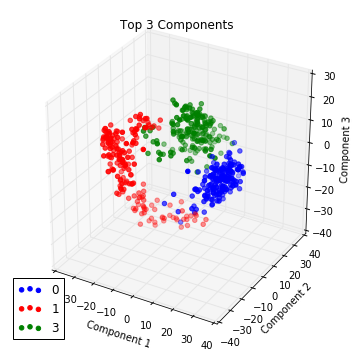

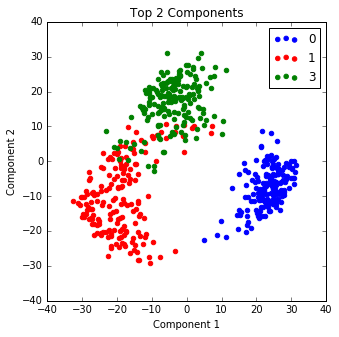

In [43]:
#Apply PCA to data and get the top 3 axes of maximum variation
pca3 = PCA(n_components=3)
pca3.fit(x)

#Project to the data onto the three axes
x_reduced3 = pca3.transform(x)

#Visualized our reduced data
fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(1, 1, 1,  projection='3d')

ax1.scatter(x_reduced3[y==0, 0], x_reduced3[y==0, 1], x_reduced3[y==0, 2], color='b', label='0')
ax1.scatter(x_reduced3[y==1, 0], x_reduced3[y==1, 1], x_reduced3[y==1, 2], color='r', label='1')
ax1.scatter(x_reduced3[y==3, 0], x_reduced3[y==3, 1], x_reduced3[y==3, 2], color='g', label='3')

ax1.set_title("Top 3 Components")
ax1.set_xlabel("Component 1")
ax1.set_ylabel("Component 2")
ax1.set_zlabel("Component 3")
ax1.legend(loc='lower left')
fig.tight_layout()

#Apply PCA to data and get the top 2 axes of maximum variation
pca2 = PCA(n_components=2)
pca2.fit(x)

#Project to the data onto the three axes
x_reduced2 = pca2.transform(x)

#Visualized our reduced data
fig = plt.figure(figsize=(5, 5))
ax = fig.gca()

ax.scatter(x_reduced2[y==0, 0], x_reduced2[y==0, 1], color='b', label='0')
ax.scatter(x_reduced2[y==1, 0], x_reduced2[y==1, 1], color='r', label='1')
ax.scatter(x_reduced2[y==3, 0], x_reduced2[y==3, 1], color='g', label='3')

ax.set_title("Top 2 Components")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.legend();

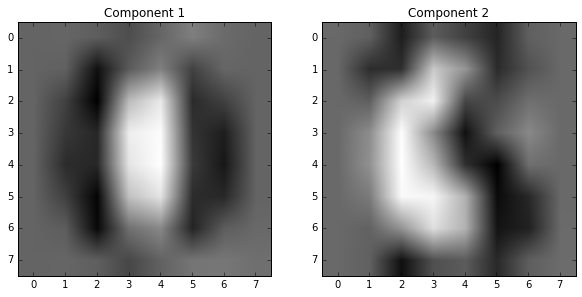

In [41]:
#Display the principal components of PCA as digital images
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# COMPONENT 1
ax[0].imshow(pca2.components_[0].reshape(8,8), cmap=plt.cm.gray_r)
ax[0].set_title('Component 1')

# COMPONENT 2
ax[1].imshow(pca2.components_[1].reshape(8,8), cmap=plt.cm.gray_r)
ax[1].set_title('Component 2');

PCA is a better choice of feature reduction because we expect combinations of nearby pixels to act together to influence whether an image is a 0, 1, or 3.  The eigenvectors from PCA are a linear combination of features.  Forward selection would not be a good strategy, because it throws away location information.

From the plots above, we see that the 3 groups of digits are well separated into clusters with only 2 components.  Although 3 is a bit better, 2 seems enough for classification.

Component 1 represents 0-1-ness.  The image shows a positive component 1 corresponding to 0 in black and negative component 1 corresponding to 1 in white.  Component 2 represents 3-ness.  The image shows a positive component in black corresponding to 3.  As further supported by the scatter plot, 0 is represented by positive component 1 and negative component 2.  1 is represented by negative component 1 and negative component 2.  3 is represented by positive component 2.

### Part 1(b). Build a classifier

So far, we have only learned models that distinguishes between two classes. Develop and implement a **simple and naive** method of distinguishing between the three digits in our reduced dataset using binary classifiers. 

In [46]:
###Build a classifier to distinguish between 0 and 1
index01 = y != 3
x01 = x_reduced2[index01, :]
y01 = y[index01]

log01 = LogisticRegression()
log01.fit(x01, y01)

###Build a classifier to distinguish between 1 and 3
index13 = y != 0
x13 = x_reduced2[index13, :]
y13 = y[index13]

log13 = LogisticRegression()
log13.fit(x13, y13)

###Build a classifier to distinguish between 0 and 3
index03 = y != 1
x03 = x_reduced2[index03, :]
y03 = y[index03]

log03 = LogisticRegression()
log03.fit(x03, y03)

#Predict a label for our dataset using each binary classifier
y_pred_01 = log01.predict(x_reduced2)
y_pred_13 = log13.predict(x_reduced2)
y_pred_03 = log03.predict(x_reduced2)

#Now, for each image, we have THREE predictions!
#To make a final decision for each image, we just take a majority vote.
n = x_reduced2.shape[0]
y_votes = np.zeros((n, 3))

#Votes for 0
y_votes[y_pred_01 == 0, 0] += 1
y_votes[y_pred_03 == 0, 0] += 1

#Votes for 1
y_votes[y_pred_01 == 1, 1] += 1
y_votes[y_pred_13 == 1, 1] += 1

#Votes for 3
y_votes[y_pred_03 == 3, 2] += 1
y_votes[y_pred_13 == 3, 2] += 1

#For each image, label it with the class that get the most votes
y_pred = y_votes.argmax(axis = 1)

#Relabel class 2 as class 3
y_pred[y_pred == 2] = 3

#Accuracy of our predictions
print 'Accuracy of combined model:', np.mean(y == y_pred)

Accuracy of combined model: 0.935543278085


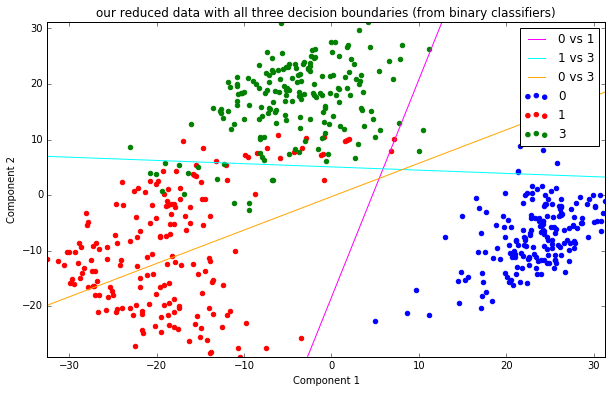

In [47]:
#--------  fit_and_plot_model
# A function to fit a binary LogReg model and visualize it
# Input: 
#      model (LogReg model)
#      ax (axes object for plotting)
#      legend_label (legend label for the plot)

def plot_model(model, ax, legend_label, color):
    #Get the coefficients from logistic regression model
    coef = model.coef_[0]
    intercept = model.intercept_
    
    #Find the max and min horizontal values of our data
    x_0 = np.min(x_reduced2[:, 0])
    x_1 = np.max(x_reduced2[:, 0])
        
    #Plug int the max and min horizontal values of our data into the equation
    #of the line defined by the coefficients
    y_0 = (-intercept - coef[0] * x_0) / coef[1]
    y_1 = (-intercept - coef[0] * x_1) / coef[1]

    #Plot a line through the pair of points we found above
    ax.plot([x_0, x_1], [y_0, y_1], label=legend_label, color=color)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

#Scatter plot of our data
ax.scatter(x_reduced2[y==0, 0], x_reduced2[y==0, 1], color='b', label='0')
ax.scatter(x_reduced2[y==1, 0], x_reduced2[y==1, 1], color='r', label='1')
ax.scatter(x_reduced2[y==3, 0], x_reduced2[y==3, 1], color='g', label='3')

#Plot decision boundaries for 0 vs 1
plot_model(log01, ax, '0 vs 1', 'magenta')
#Plot decision boundaries for 1 vs 3
plot_model(log13, ax, '1 vs 3', 'cyan')
#Plot decision boundaries for 0 vs 3
plot_model(log03, ax, '0 vs 3', 'orange')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_xlim([np.min(x_reduced2[:,0]), np.max(x_reduced2[:,0])])
ax.set_ylim([np.min(x_reduced2[:,1]), np.max(x_reduced2[:,1])])
ax.set_title('our reduced data with all three decision boundaries (from binary classifiers)')
ax.legend()
plt.show()

### Part 1(c). Build a better one
Assess the quality of your classifier.


- What is the fit (in terms of accuracy or R^2) of your model on the reduced dataset? Visually assess the quality of your classifier by plotting decision surfaces along with the data. Why is visualization of the decision surfaces useful? What does this visualization tell you that a numerical score (like accuracy or R^2) cannot?


- What are the draw backs of your approach to multi-class classification? What aspects of your method is contributing to these draw backs, i.e. why does it fail when it does? 

  (**Hint:** make use your analysis in the above; think about what happens when we have to classify 10 classes, 100 classes)
 
 
- Describe a possibly better alternative for fitting a multi-class model. Specifically address why you expect the alternative model to outperform your model.

  (**Hint:** How does ``sklearn``'s Logistic regression module handle multiclass classification?).

Our model has an accuracy of 0.936.  Visually, the decision boundaries split the data nicely into 3 groups.  The visualization is useful to checking that the model intuitively represents the data, and we are not getting a high accurary by chance.  Visualization also tells us that most of the classification error comes from the 1 and 3 boundary and a 3-way tie is rare (triangle in the middle).

Drawbacks of this approach of multi-class classification include slow computation speed and ties. This approach requires $k \choose 2$ models, which can be large when the number of classes grows.  Furthermore, the discreteness of votes means ties might happen (especially if we have a even number of classes) and there's not a easy way to break ties expect randomly.

Another alternative for fitting a multi-class model is creating one-vs-rest (OVR) binary models. For this application, we would build 3 models: 0 vs not-0, 1 vs not-1, and 3 vs not-3. We then classify the input as the number that is predicted from any model with the highest probability.  This approach scales better computationally, because it takes $O(k)$ models rather than $k \choose 2$, or $O(k^2)$ models.  Furthermore, this approach take into account the magnitudes of the probabilties rather than just binary votes (e.g. if a number of 70% likely to be a 3 and 60% likely to be a 0, it gets classified as a 3 rather than both 3 and 0 getting one vote).  Therefore, we expect this strategy to perform better.

## Problem 2. Sentiment Analysis

In this problem, you will explore how to predict the underlying emotional tone of textual data - this task is called sentiment analysis. 

You will be using the dataset in the file `dataset_2.txt`. In this dataset, there are 1382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. 

Given a new post about an automobile, your goal is to predict if the sentiment expressed in the new post is positive or negative. For this task you should implement a *regularized* logistic regression model.

Produce a report summarizing your solution to this problem:

- Your report should address all decisions you made in the "Data Science Process" (from Lectures #0, #1, #2):

   a. Data collection & cleaning
   
   b. Data exploration
   
   c. Modeling
   
   d. Analysis  
   
   e. Visualization and presentation  


- Your report should be informative and accessible to a **general audience with no assumed formal training in mathematics, statistics or computer science**.


- The exposition in your report, not including code, visualization and output, should be at least three paragraphs in length (you are free to write more, but you're not required to).

Structure your presentation and exposition like a professional product that can be submitted to a client and or your supervisor at work.

In [5]:
#load and explore data
ford_reviews = pd.read_csv("datasets/dataset_2.txt")
print ford_reviews.shape
print ford_reviews.head()
print ford_reviews["class"].value_counts()

(1382, 2)
  class                                               text
0   Neg   In 1992 we bought a new Taurus and we really ...
1   Neg   The last business trip  I drove to San Franci...
2   Neg   My husband and I purchased a 1990 Ford F250 a...
3   Neg   I feel I have a thorough opinion of this truc...
4   Neg   AS a mother of 3  all of whom are still in ca...
Pos    691
Neg    691
Name: class, dtype: int64


Word feature count 1484
Sample Word features
[u'00', u'3rd', u'adjustable', u'attempt', u'boards', u'cassette', u'combination', u'costly', u'design', u'engineering', u'fall', u'fortunately', u'hadn', u'honda', u'issues', u'legs', u'lumbar', u'month', u'oil', u'pedal', u'press', u'read', u'rest', u'sedan', u'slipping', u'stated', u'tachometer', u'towing', u'using', u'windshield']

Most positive words
[ 0.3485477   0.26533804  0.24831822  0.2472249   0.23001958  0.22918513
  0.2054171   0.20020906  0.18953469  0.18935504]
[u'trips', u'perfect', u'highly', u'snow', u'reliable', u'fun', u'radio', u'plenty', u'excellent', u'knew']

Most negative words
[-0.2523459  -0.24441878 -0.2376147  -0.23474847 -0.23359911 -0.21999742
 -0.21436585 -0.20587699 -0.20319632 -0.19861369]
[u'recalls', u'worst', u'fixed', u'broke', u'started', u'toyota', u'cost', u'hate', u'service', u'uncomfortable']

Best Regularization Param C [ 0.02636651]


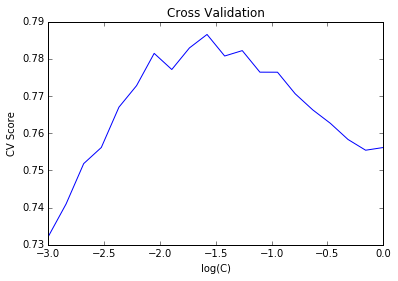

In [47]:
sentiments = ford_reviews["class"]

#convert text to bag of words
cv = CountVectorizer(stop_words="english", min_df=25, max_df=250)
bag_of_words = cv.fit_transform(ford_reviews["text"].as_matrix())

words = cv.get_feature_names()

print "Word feature count", len(words)
print "Sample Word features"
print words[::50]
print

#logistic regression model
log_c_params = np.linspace(-3, 0, 20)
c_params = 10**log_c_params

model = LogisticRegressionCV(Cs=c_params)
model.fit(bag_of_words, sentiments)

#determine most relevant features
#coefficient value is an indicator since all features are on same scale
coeff = model.coef_[0]
coeff_indicies = np.argsort(coeff)
max_coeff_indicies = coeff_indicies[-10:][::-1] #reverse
min_coeff_indicies = coeff_indicies[:10]
print "Most positive words"
print coeff[max_coeff_indicies]
print [words[i] for i in max_coeff_indicies]
print
print "Most negative words"
print coeff[min_coeff_indicies]
print [words[i] for i in min_coeff_indicies]
print

#Plot cross validation scores
cross_validation_scores = np.mean(model.scores_["Pos"], axis=0)
plt.figure()
plt.plot(log_c_params, cross_validation_scores)
plt.xlabel("log(C)")
plt.ylabel("CV Score")
plt.title("Cross Validation")

print "Best Regularization Param C", model.C_

## Report

We collected 1,382 Ford customer reviews, half with positive sentiment and half with negative sentiment as examples to train our model.  We wanted to see if any particular words were good indicators of the sentiment of the review.  We broke down the text of each of reviews into counts of individual words.  We narrowed the word list down to 1,484 words by throwing out common English words such as "the" and "of", words that occurred in more than 250 times, and rare words that occurred less than 25 times.  The idea was to only consider words common enough that we can find relationships, but not so common that they have nothing to do with cars or customer sentiment.

We created a logistic regression model to predict review sentiment based on those word counts.  Logistic regression is a simple method for combining multiple inputs to predict the output with 2 possible values--in this case positive and negative sentiment.  We analyzed the model's performance with 3-fold cross-validation, i.e. we divided our data into 3 groups, used 2/3 of the data to build our model, and checked how well the model did on the remaining 1/3 for each group.  Cross-validation allows us to tune some model parameters, and ensures our model does not overfit and will work well on new inputs.  Our model is able to predict the sentiment of a review with 79% accuracy.  Furthermore, we were able to extract the positive and negative words that customers associate with Ford cars.

**Positive Words:** trips, perfect, highly, snow, reliable, fun, radio, plenty, excellent, knew<br/>
**Negative Words:** recalls, worst, fixed, broke, started, toyota, cost, hate, service, uncomfortable

We have successfully constructed a model to predict customer review sentiment.  Further work with more sophisicated text analysis may improve our current accuracy of 79%.  We have also gained some insight on what customers value about Ford cars.  Positive words such as "trips", "snow", and "reliable" indicate things Ford is doing well.  Negative words such as "recalls", "cost", and "service" indicate things Ford could be doing better.

## Challenge Problem: Automated Medical Diagnosis

In this problem, you are going to build a model to diagnose heart disease. 

The training set is provided in the file ``dataset_3_train.txt`` and there are two test sets: ``dataset_3_test_1.txt`` and ``dataset_3_test_2.txt``. Each patient in the datasets is described by 5 biomarkers extracted from cardiac SPECT images; the last column in each dataset contains the disease diagnosis (1 indicates that the patient is normal, and 0 indicates that the patient suffers from heart disease).

- Fit a logistic regression model to the training set, and report its accuracy on both the test sets. 


- Is your accuracy rate meaningful or reliable? How comfortable would you be in using your predictions to diagnose real living patients? Justify your answers. 

  (**Hint:** How does the performance of your model compare with a classifier that lumps all patients into the same class?)


- Let's call the logistic regression model you learned, ${C}_1$. Your colleague suggests that you can get higher accuracies for this task by using a threshold of 0.05 on the Logistic regression model to predict labels instead of the usual threshold of 0.5, i.e. use a classifier that predicts 1 when $\widehat{P}(Y = 1\,|\, X) \geq 0.05$ and 0 otherwise. Let's call this classifier ${C}_2$. Does ${C}_2$ perform better the two test sets - that is, which one would you rather use for automated diagnostics? Support your conclusion with careful analysis. 


- Generalize your analysis of these two classifiers. Under what general conditions does $C_2$ perform better than ${C}_1$? Support your conclusion with a mathematical proof or simulation


**Hint:** You were told in class that a classifier that predicts 1 when $\widehat{P}(Y = 1 \,|\, X) \geq 0.5$, and 0 otherwise, is the Bayes classifier. This classifier minimizes the classification error rate. What can you say about a classifier that uses a threshold other than $0.5$? Is it the Bayes classifier for a different loss function?


**Hint:** For the first three parts, you might find it useful to analyze the conditional accuracy on each class.

In [2]:
#load and explore data
heart_data = OrderedDict()
for ds in ("train", "test_1", "test_2"):
    heart_data[ds] = np.genfromtxt("datasets/dataset_3_" + ds + ".txt", delimiter=",")

for key, data in heart_data.iteritems():
    print key
    n = data.shape[0]
    print "Patients", n
    print "Sick Proportion", float(data[data[:,-1] == 1].shape[0]) / n 
    print "Normal Proportion", float(data[data[:,-1] == 0].shape[0]) / n
    print

train
Patients 156
Sick Proportion 0.0512820512821
Normal Proportion 0.948717948718

test_1
Patients 67
Sick Proportion 0.0597014925373
Normal Proportion 0.940298507463

test_2
Patients 94
Sick Proportion 0.5
Normal Proportion 0.5



In [28]:
#fit model
model = LogisticRegression(C = 1e6)
model.fit(heart_data["train"][:,:-1], heart_data["train"][:,-1])
print "Test 1 Accuracy", model.score(heart_data["test_1"][:,:-1], heart_data["test_1"][:,-1])
print "Test 2 Accuracy", model.score(heart_data["test_2"][:,:-1], heart_data["test_2"][:,-1])
print

#calculate true positives, true negatives, false postives, and false negatives
#inputs: threshold - decision boundary cutoff
#        dataset - test set
def confusion_matrix(threshold, dataset):
    predict_sick = model.predict_proba(dataset[:,:-1])[:,1] >= threshold
    actual_sick = dataset[:,-1]
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    for predict, actual in zip(predict_sick, actual_sick):
        if predict:
            if actual:
                true_positives += 1
            else:
                false_positives += 1
        else:
            if actual:
                false_negatives += 1
            else:
                true_negatives += 1
    return true_positives, true_negatives, false_positives, false_negatives

#print values from threshold score function above
def print_scores(threshold, dataset):
    matrix = confusion_matrix(threshold, dataset)
    true_positives, true_negatives, false_positives, false_negatives = matrix
    accuracy = float(true_positives + true_negatives) / sum(matrix)
    sensitivity = float(true_positives) / (true_positives + false_negatives) if true_positives else 0
    precision = float(true_positives) / (true_positives + false_positives) if true_positives else 0
    print "Cutoff:", threshold
    print "True Positives", true_positives
    print "True Negatives", true_negatives
    print "False Positives", false_positives
    print "False Negatives", false_negatives
    print "Accuracy", accuracy
    print "Sensitivity", sensitivity
    print "Precision", precision
    print

print "Test 1"
print_scores(0.5, heart_data["test_1"])
print_scores(0.05, heart_data["test_1"])

print "Test 2"
print_scores(0.5, heart_data["test_2"])
print_scores(0.05, heart_data["test_2"])

Test 1 Accuracy 0.940298507463
Test 2 Accuracy 0.5

Test 1
Cutoff: 0.5
True Positives 0
True Negatives 63
False Positives 0
False Negatives 4
Accuracy 0.940298507463
Sensitivity 0
Precision 0

Cutoff: 0.05
True Positives 2
True Negatives 43
False Positives 20
False Negatives 2
Accuracy 0.671641791045
Sensitivity 0.5
Precision 0.0909090909091

Test 2
Cutoff: 0.5
True Positives 0
True Negatives 47
False Positives 0
False Negatives 47
Accuracy 0.5
Sensitivity 0
Precision 0

Cutoff: 0.05
True Positives 26
True Negatives 29
False Positives 18
False Negatives 21
Accuracy 0.585106382979
Sensitivity 0.553191489362
Precision 0.590909090909



The logistic model $C_1$ achieved an accuracy of 0.94 on test set 1 and 0.5 on test set 2.  However, simply predicting all of the patients to be normal (y = 1) also achieves the same accuracies, as shown by the proportion of normal people in each test set.  Furthermore, if you look at the number of true and false positives, you notice the model just doesn't predict any positives at all.  Therefore, I would not be comfortable using this model to diagnose real patients.

Compared to $C_1$, the $C_2$ model has better accuracy for test set 2, but worse accuracy than test set 1.  However, perhaps sensitivity and precision are better metrics.  If I had to choose one of these two models, I would choose $C_2$ because it has a sensitivity of around 0.5 for both tests sets (i.e. it catches about half the patients with heart disease).  The precision / positive predictive value is not great for test set 1 (20 false positives to 2 true positives), but it is better to err on the side of more false positives and to perform followup medical tests when someone's health is on the line.  In some sense, the cutoff of 0.05 corresponds to a Bayes classifier with a weighted loss function where a false negative is worse than a false positive.

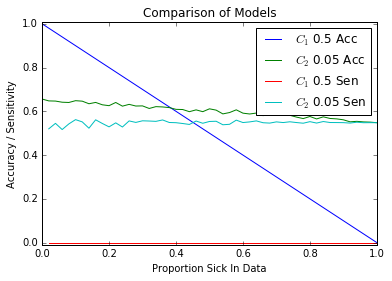

In [48]:
np.random.seed(0)

#generate normal and sick test pools
normal_test = np.concatenate((heart_data["test_1"][heart_data["test_1"][:,-1] == 0],
                              heart_data["test_2"][heart_data["test_2"][:,-1] == 0]))
sick_test = np.concatenate((heart_data["test_1"][heart_data["test_1"][:,-1] == 1],
                            heart_data["test_2"][heart_data["test_2"][:,-1] == 1]))

#simulate model performance for various proportions of sick
nsims = 100
nprop = 51
accuracy5 = []
accuracy05 = []
sensitivity5 = []
sensitivity05 = []
for sick_count in xrange(nprop):
    matrix5 = np.zeros(4)
    matrix05 = np.zeros(4)
    #simulate each proportial nsims times
    for sims in xrange(nsims):
        sample = np.concatenate((normal_test[np.random.choice(normal_test.shape[0], size=50-sick_count, replace=False)],
                                 sick_test[np.random.choice(sick_test.shape[0], size=sick_count, replace=False)]))
        matrix5 = matrix5 + np.array(confusion_matrix(0.5, sample))
        matrix05 = matrix05 + np.array(confusion_matrix(0.05, sample))
    #unpack confusion matrix
    true_positives, true_negatives, false_positives, false_negatives = matrix5
    accuracy5.append(float(true_positives + true_negatives) / np.sum(matrix))
    sensitivity5.append(float(true_positives) / (true_positives + false_negatives))
    true_positives, true_negatives, false_positives, false_negatives = matrix05
    accuracy05.append(float(true_positives + true_negatives) / np.sum(matrix))
    sensitivity05.append(float(true_positives) / (true_positives + false_negatives))

proportions = np.linspace(0, 1, nprop)
plt.figure(figsize=(6,4))
plt.title("Comparison of Models")
plt.plot(proportions, accuracy5, label="$C_1$ 0.5 Acc")
plt.plot(proportions, accuracy05, label="$C_2$ 0.05 Acc")
plt.plot(proportions, sensitivity5, label="$C_1$ 0.5 Sen")
plt.plot(proportions, sensitivity05, label="$C_2$ 0.05 Sen")
plt.ylim((-0.01, 1.01))
plt.xlabel("Proportion Sick In Data")
plt.ylabel("Accuracy / Sensitivity")
plt.legend();

From simulating test data of various proportions of sick patients, the $C_2$ performs consistently with about a 0.5 sensitivity, which is better than $C_1$.  Note that $C_1$ is more accurate overall when the proportion of sick is less than about 0.4, but the model never predicts anyone to be sick so is useless for our application.